# Run this notebook from top to down. [Order Dependent]

### Question 2(without normalization)

Train the perceptron model on training data and use the model to classify test data.

In [107]:
# imports and configurations
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.rcParams["figure.figsize"] = (20,10)

data_file = "Dataset Question2.csv"
test_size = 0.2

max_itr = 123456

In [88]:
df = pd.read_csv(data_file, header=None)
num_features = df.columns.shape[0] - 1
X_train, X_test, y_train, y_test = train_test_split(df[list(range(4))].to_numpy(), df[4].add(0.1).astype(np.int).to_numpy(), test_size=0.2)

# Augmenting the data and mapping labels {0, 1} to {-1, +1}
X_train = np.hstack((np.ones(X_train.shape[0]).reshape(-1, 1), X_train))
y_train = y_train * 2 - 1

X_test = np.hstack((np.ones(X_test.shape[0]).reshape(-1, 1), X_test))
y_test = y_test * 2 - 1

# result data need to retrieve from model
zero_one_loss = []
itr_num = []
count_misclassified = []
tr_confusion_matrix = None
ts_confusion_matrix = None
weights = None

# perceptron learning
W = np.random.randn(X_train.shape[1])

converged = False
k = 0
sampling_idx = 1

while k < max_itr and not converged:
    Z = np.multiply(np.dot(X_train, W), y_train)

    idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
    if k == sampling_idx:
        sampling_idx *= 2
        zero_one_loss.append(idx_misclassified.shape[0] / Z.shape[0])
        count_misclassified.append(idx_misclassified.shape[0])
        itr_num.append(k)
        print("{}-th itr. weight: {}, zero-one-loss: {}".format(k, np.round(W / np.linalg.norm(W),3), zero_one_loss[-1]))

    converged = True

    for j in idx_misclassified:
        W = W + y_train[j] * X_train[j]
        converged = False
    k += 1

norm_W = W / np.linalg.norm(W)
print("Normalized weights at convergence is {}".format(np.round(norm_W,3)))

weights = norm_W

# final loss
Z = np.multiply(np.dot(X_train,W), y_train)
idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
zero_one_loss.append(idx_misclassified.shape[0] / Z.shape[0])
count_misclassified.append(idx_misclassified.shape[0])
itr_num.append(k)

# building confusion matrix for train data
Y_pred = np.dot(X_train,W)
Y_Y_pred = np.multiply(y_train, Y_pred)
true_idx = np.where(Y_Y_pred > 0)
neg_idx = np.where(Y_Y_pred < 0)
tp = np.where(y_train[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
fp = np.where(y_train[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
fn = np.where(y_train[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
tn = np.where(y_train[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
tr_confusion_matrix = np.array([[tp, fp], [fn, tn]])

# building confusion matrix for test data
Y_pred = np.dot(X_test,W)
Y_Y_pred = np.multiply(y_test, Y_pred)
true_idx = np.where(Y_Y_pred > 0)
neg_idx = np.where(Y_Y_pred < 0)
tp = np.where(y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
fp = np.where(y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
fn = np.where(y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
tn = np.where(y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
ts_confusion_matrix = np.array([[tp, fp], [fn, tn]])

# finding accuracy on test data
Z = np.multiply(np.dot(X_test, W), y_test)
num_misclassified = np.argwhere(Z <= 0).reshape(-1).shape[0]
accuracy = round(100 * (1 - num_misclassified/y_test.shape[0]),2)
print("Test Count: {}\nMisclassified: {}\nTest Accuracy: {}%".format(y_test.shape[0], num_misclassified, accuracy))

(1097, 4)
(1097,)
(1097, 5)
(1097,)
(275, 5)
(275,)
1-th itr. weight: [ 0.003 -0.326 -0.783  0.522  0.087], zero-one-loss: 0.35824977210574294
2-th itr. weight: [ 0.032 -0.686 -0.655  0.303 -0.085], zero-one-loss: 0.27620783956244305
4-th itr. weight: [ 0.07  -0.887 -0.262 -0.253 -0.273], zero-one-loss: 0.07292616226071102
8-th itr. weight: [ 0.122 -0.811 -0.348 -0.411 -0.194], zero-one-loss: 0.03919781221513218
16-th itr. weight: [ 0.228 -0.736 -0.39  -0.48  -0.156], zero-one-loss: 0.03099361896080219
32-th itr. weight: [ 0.355 -0.668 -0.412 -0.484 -0.15 ], zero-one-loss: 0.018231540565177756
64-th itr. weight: [ 0.445 -0.641 -0.384 -0.477 -0.129], zero-one-loss: 0.01731996353691887
128-th itr. weight: [ 0.522 -0.637 -0.355 -0.435 -0.084], zero-one-loss: 0.008204193254329991
256-th itr. weight: [ 0.582 -0.618 -0.32  -0.418 -0.053], zero-one-loss: 0.011850501367365542
512-th itr. weight: [ 0.585 -0.617 -0.334 -0.405 -0.047], zero-one-loss: 0.009115770282588878
1024-th itr. weight: [ 0.

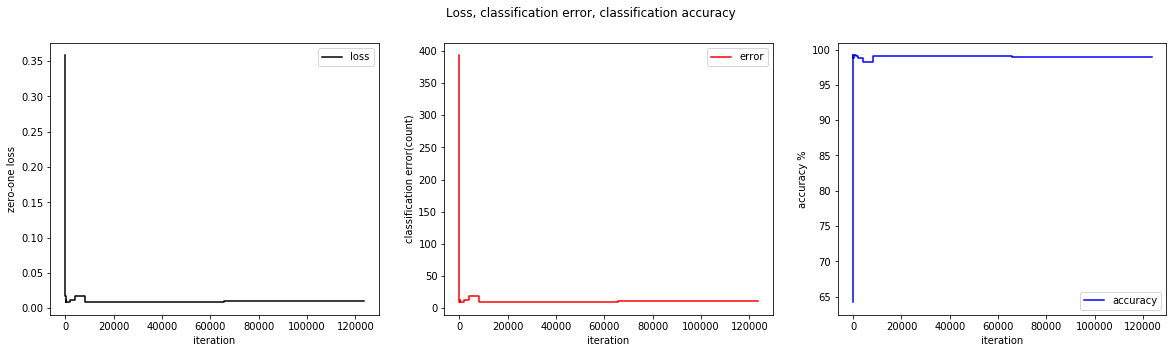

In [101]:
loss = np.array(zero_one_loss)
error = np.array(count_misclassified)
accuracy_percent = (1-loss)*100

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,5)
fig.suptitle('Loss, classification error, classification accuracy')

ax[0].step(itr_num, loss, 'k-', label='loss')
ax[0].set_ylabel('zero-one loss')
ax[0].set_xlabel('iteration')

ax[1].step(itr_num, error, 'r-', label='error')
ax[1].set_ylabel('classification error(count)')
ax[1].set_xlabel('iteration')

ax[2].step(itr_num, accuracy_percent, 'b-', label='accuracy')
ax[2].set_ylabel('accuracy %')
ax[2].set_xlabel('iteration')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

### Confusion Matrix

True positive: Actual positive, predicted positive

True negative: Actual negative, predicted negative

False positive: Actual negative, predicted positive

False negative: Actual positive, predicted negative

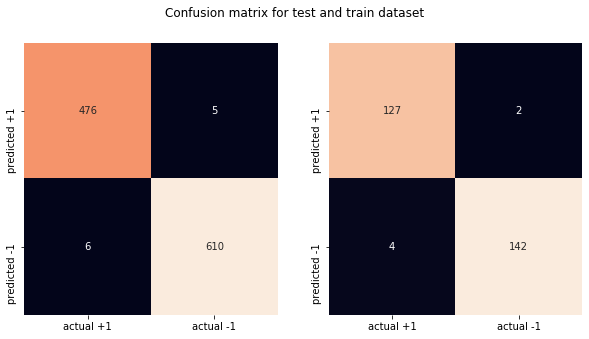

In [103]:
xtick_label = ['actual +1', 'actual -1']
ytick_label = ['predicted +1', 'predicted -1']

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
fig.suptitle('Confusion matrix for test and train dataset')

sns.heatmap(tr_confusion_matrix, annot=True, ax=ax[0], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)
sns.heatmap(ts_confusion_matrix, annot=True, ax=ax[1], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)

In [104]:
print("Normalized weights: {}".format(weights))

Normalized weights: [ 0.58708518 -0.61579355 -0.34604285 -0.39244088 -0.0487216 ]


### Question 2(with normalization)

Normalize the training data using MinMaxScalar. Train the perceptron model on normalized data and use the model to classify test data. Compare this model with the above model.

In [108]:
df = pd.read_csv(data_file, header=None)
num_features = df.columns.shape[0] - 1
X_train, X_test, y_train, y_test = train_test_split(df[list(range(4))].to_numpy(), df[4].add(0.1).astype(np.int).to_numpy(), test_size=0.2)

# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Augmenting the data and mapping labels {0, 1} to {-1, +1}
X_train = np.hstack((np.ones(X_train.shape[0]).reshape(-1, 1), X_train))
y_train = y_train * 2 - 1

X_test = np.hstack((np.ones(X_test.shape[0]).reshape(-1, 1), X_test))
y_test = y_test * 2 - 1

# result data need to retrieve from model
zero_one_loss = []
itr_num = []
count_misclassified = []
tr_confusion_matrix = None
ts_confusion_matrix = None
weights = None

# perceptron learning
W = np.random.randn(X_train.shape[1])

converged = False
k = 0
sampling_idx = 1

while k < max_itr and not converged:
    Z = np.multiply(np.dot(X_train, W), y_train)

    idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
    if k == sampling_idx:
        sampling_idx *= 2
        zero_one_loss.append(idx_misclassified.shape[0] / Z.shape[0])
        count_misclassified.append(idx_misclassified.shape[0])
        itr_num.append(k)
        print("{}-th itr. weight: {}, zero-one-loss: {}".format(k, np.round(W / np.linalg.norm(W),3), zero_one_loss[-1]))

    converged = True

    for j in idx_misclassified:
        W = W + y_train[j] * X_train[j]
        converged = False
    k += 1

norm_W = W / np.linalg.norm(W)
print("Normalized weights at convergence is {}".format(np.round(norm_W,3)))

weights = norm_W

# final loss
Z = np.multiply(np.dot(X_train,W), y_train)
idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
zero_one_loss.append(idx_misclassified.shape[0] / Z.shape[0])
count_misclassified.append(idx_misclassified.shape[0])
itr_num.append(k)

# building confusion matrix for train data
Y_pred = np.dot(X_train,W)
Y_Y_pred = np.multiply(y_train, Y_pred)
true_idx = np.where(Y_Y_pred > 0)
neg_idx = np.where(Y_Y_pred < 0)
tp = np.where(y_train[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
fp = np.where(y_train[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
fn = np.where(y_train[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
tn = np.where(y_train[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
tr_confusion_matrix = np.array([[tp, fp], [fn, tn]])

# building confusion matrix for test data
Y_pred = np.dot(X_test,W)
Y_Y_pred = np.multiply(y_test, Y_pred)
true_idx = np.where(Y_Y_pred > 0)
neg_idx = np.where(Y_Y_pred < 0)
tp = np.where(y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
fp = np.where(y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
fn = np.where(y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
tn = np.where(y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
ts_confusion_matrix = np.array([[tp, fp], [fn, tn]])

# finding accuracy on test data
Z = np.multiply(np.dot(X_test, W), y_test)
num_misclassified = np.argwhere(Z <= 0).reshape(-1).shape[0]
accuracy = round(100 * (1 - num_misclassified/y_test.shape[0]),2)
print("Test Count: {}\nMisclassified: {}\nTest Accuracy: {}%".format(y_test.shape[0], num_misclassified, accuracy))

1-th itr. weight: [0.716 0.268 0.346 0.231 0.493], zero-one-loss: 0.5569735642661805
2-th itr. weight: [-0.387 -0.693 -0.548 -0.008 -0.264], zero-one-loss: 0.4430264357338195
4-th itr. weight: [-0.383 -0.692 -0.551 -0.008 -0.266], zero-one-loss: 0.4430264357338195
8-th itr. weight: [ 0.675 -0.519 -0.148  0.299  0.405], zero-one-loss: 0.5569735642661805
16-th itr. weight: [ 0.169 -0.874 -0.453  0.039 -0.012], zero-one-loss: 0.4375569735642662
32-th itr. weight: [ 0.301 -0.866 -0.396 -0.003  0.042], zero-one-loss: 0.39380127620783956
64-th itr. weight: [ 0.541 -0.756 -0.254 -0.25   0.096], zero-one-loss: 0.07748404740200547
128-th itr. weight: [ 0.557 -0.623 -0.311 -0.447  0.077], zero-one-loss: 0.019143117593436645
256-th itr. weight: [ 0.578 -0.52  -0.396 -0.486  0.043], zero-one-loss: 0.011850501367365542
512-th itr. weight: [ 0.606 -0.456 -0.43  -0.489 -0.016], zero-one-loss: 0.01276207839562443
1024-th itr. weight: [ 0.613 -0.438 -0.438 -0.489 -0.034], zero-one-loss: 0.0100273473108

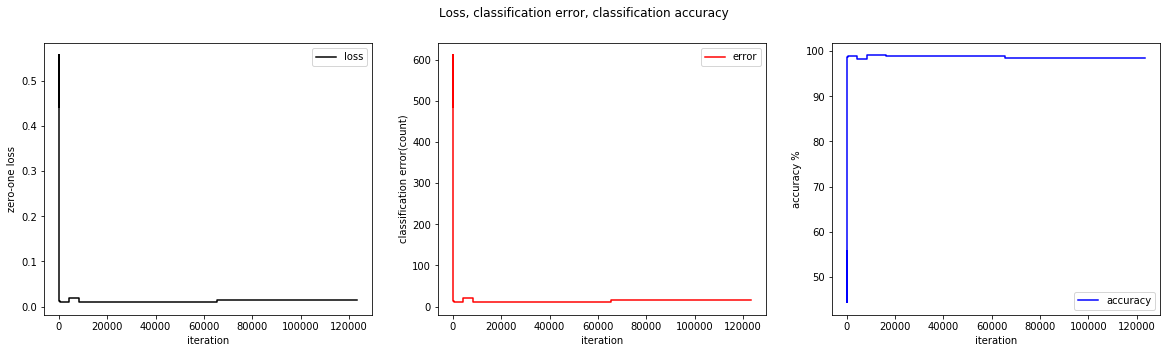

In [109]:
loss = np.array(zero_one_loss)
error = np.array(count_misclassified)
accuracy_percent = (1-loss)*100

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,5)
fig.suptitle('Loss, classification error, classification accuracy')

ax[0].step(itr_num, loss, 'k-', label='loss')
ax[0].set_ylabel('zero-one loss')
ax[0].set_xlabel('iteration')

ax[1].step(itr_num, error, 'r-', label='error')
ax[1].set_ylabel('classification error(count)')
ax[1].set_xlabel('iteration')

ax[2].step(itr_num, accuracy_percent, 'b-', label='accuracy')
ax[2].set_ylabel('accuracy %')
ax[2].set_xlabel('iteration')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

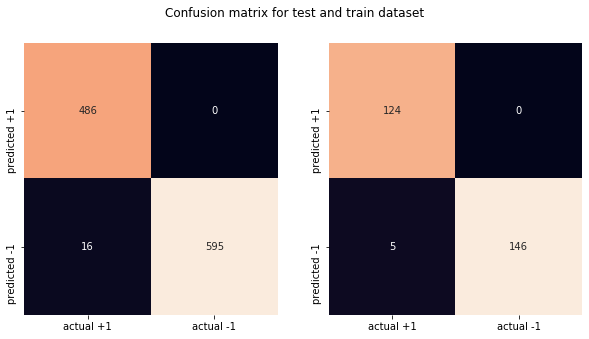

In [110]:
xtick_label = ['actual +1', 'actual -1']
ytick_label = ['predicted +1', 'predicted -1']

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
fig.suptitle('Confusion matrix for test and train dataset')

sns.heatmap(tr_confusion_matrix, annot=True, ax=ax[0], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)
sns.heatmap(ts_confusion_matrix, annot=True, ax=ax[1], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)

In [111]:
print("Normalized weights: {}".format(weights))

Normalized weights: [ 0.61943288 -0.42322936 -0.44534765 -0.48787634 -0.02866989]


### Conclusion